In [1]:
# 1. Import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, silhouette_score

In [2]:
# Ścieżki do plików
data_path = "samsung_HAR/samsung_train.txt"
labels_path = "samsung_HAR/samsung_train_labels.txt"

# Wczytanie danych
data = pd.read_csv(data_path, delim_whitespace=True, header=None)
labels = pd.read_csv(labels_path, delim_whitespace=True, header=None)

print("Shape danych:", data.shape)
print("Shape etykiet:", labels.shape)

C:\Users\dpiekutowska\AppData\Local\Temp\ipykernel_1616\4133371392.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(data_path, delim_whitespace=True, header=None)


Shape danych: (7352, 561)
Shape etykiet: (7352, 1)


C:\Users\dpiekutowska\AppData\Local\Temp\ipykernel_1616\4133371392.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels = pd.read_csv(labels_path, delim_whitespace=True, header=None)


In [3]:
# Skalowanie
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("Shape po skalowaniu:", data_scaled.shape)

Shape po skalowaniu: (7352, 561)


In [4]:
# PCA na 65 komponentów
pca = PCA(n_components=65)
data_pca_65 = pca.fit_transform(data_scaled)

# Dla wizualizacji 2D zrobimy też PCA na 2 komponenty
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_scaled)

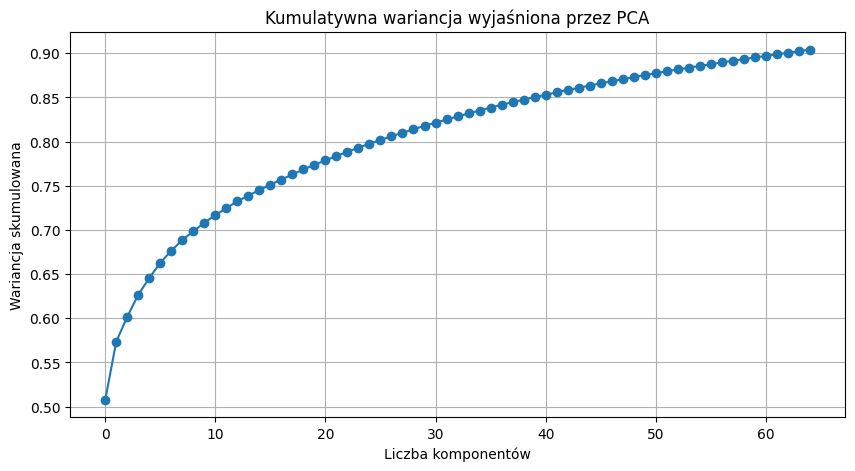

In [5]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Kumulatywna wariancja wyjaśniona przez PCA')
plt.xlabel('Liczba komponentów')
plt.ylabel('Wariancja skumulowana')
plt.grid()
plt.show()

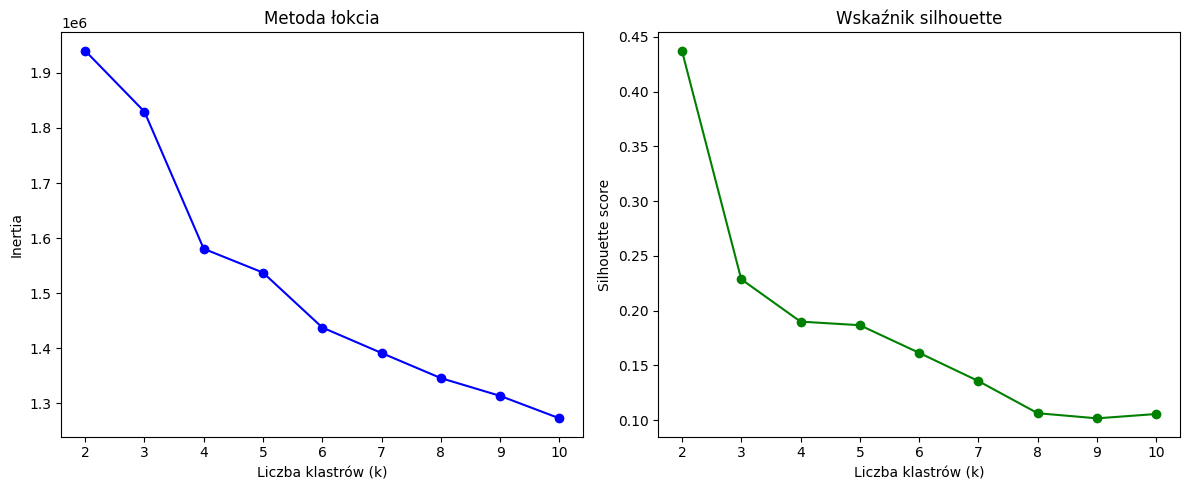

In [6]:
inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca_65)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_pca_65, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inertia')
plt.title('Metoda łokcia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, 'go-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Silhouette score')
plt.title('Wskaźnik silhouette')

plt.tight_layout()
#Kplt.show()

In [7]:
#KMeans na 6 klastrów
optimal_k = 6
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(data_pca_65)

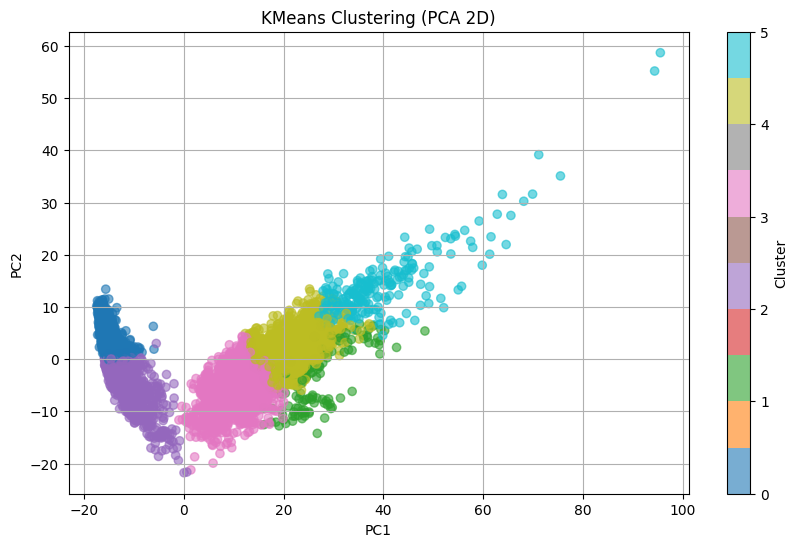

In [8]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], c=clusters, cmap='tab10', alpha=0.6)
plt.title('KMeans Clustering (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

In [9]:
X = data_pca_65  # Dane po PCA
y = labels[0].values  # Etykiety (prawdziwe klasy)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.98      0.97       368
           2       0.98      0.92      0.95       322
           3       0.93      0.96      0.94       296
           4       0.90      0.84      0.87       386
           5       0.88      0.92      0.90       412
           6       0.98      1.00      0.99       422

    accuracy                           0.94      2206
   macro avg       0.94      0.94      0.94      2206
weighted avg       0.94      0.94      0.94      2206



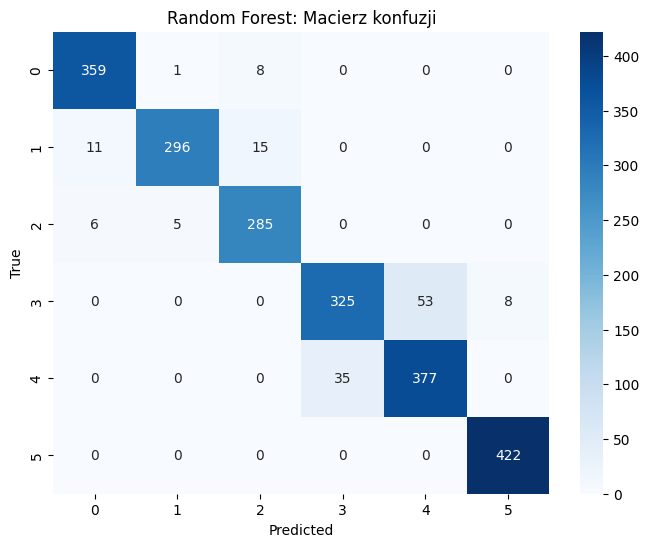

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Ocena
print("Classification Report:\n", classification_report(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest: Macierz konfuzji")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# (przekszalamy klasy na liczby, tylko dla przykładu)
y_train_reg = y_train
y_test_reg = y_test

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train_reg)
y_pred_reg = regressor.predict(X_test)

mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (tylko pokazowe): {mse:.4f}")

Mean Squared Error (tylko pokazowe): 0.1183
